In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Supplement_Sales_Weekly_Expanded.csv")
print(df.head(5))

         Date  Product Name     Category  Units Sold  Price  Revenue  \
0  2020-01-06  Whey Protein      Protein         143  31.98  4573.14   
1  2020-01-06     Vitamin C      Vitamin         139  42.51  5908.89   
2  2020-01-06      Fish Oil        Omega         161  12.91  2078.51   
3  2020-01-06  Multivitamin      Vitamin         140  16.07  2249.80   
4  2020-01-06   Pre-Workout  Performance         157  35.47  5568.79   

   Discount  Units Returned Location Platform  
0      0.03               2   Canada  Walmart  
1      0.04               0       UK   Amazon  
2      0.25               0   Canada   Amazon  
3      0.08               0   Canada  Walmart  
4      0.25               3   Canada    iHerb  


In [56]:
#DATA EXPLORATION
print(df.shape)
print(df.columns)
print(df.info())
print(df.isna().sum())

(4384, 10)
Index(['Date', 'Product Name', 'Category', 'Units Sold', 'Price', 'Revenue',
       'Discount', 'Units Returned', 'Location', 'Platform'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB
None
Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue     

In [57]:
#Data Convert 
df["Date"]=pd.to_datetime(df["Date"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB
None


In [58]:
#Missing Values
missing= df.isnull().sum()
print("missing values:\n", missing)

missing values:
 Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


In [59]:
Drop_Duplicates=df.drop_duplicates(inplace=True)


In [60]:
df.head(10)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
5,2020-01-06,BCAA,Amino Acid,154,41.19,6343.26,0.13,1,UK,Walmart
6,2020-01-06,Creatine,Performance,134,32.49,4353.66,0.05,1,UK,Walmart
7,2020-01-06,Zinc,Mineral,147,46.68,6861.96,0.19,0,Canada,Amazon
8,2020-01-06,Collagen Peptides,Protein,147,10.96,1611.12,0.06,2,USA,Amazon
9,2020-01-06,Magnesium,Mineral,134,20.76,2781.84,0.00,0,Canada,Amazon


In [61]:
df.groupby("Product Name").size() #How many types of products are there in the dataset 


Product Name
Ashwagandha           274
BCAA                  274
Biotin                274
Collagen Peptides     274
Creatine              274
Electrolyte Powder    274
Fish Oil              274
Green Tea Extract     274
Iron Supplement       274
Magnesium             274
Melatonin             274
Multivitamin          274
Pre-Workout           274
Vitamin C             274
Whey Protein          274
Zinc                  274
dtype: int64

In [62]:
df["Product Name"].nunique()


16

In [63]:
#Exploratory Data Analysis

#Which is the most selling product from which category and location
df.iloc[df["Revenue"].idxmax()] #Highest revenue index

Date              2022-11-14 00:00:00
Product Name             Whey Protein
Category                      Protein
Units Sold                        187
Price                           57.55
Revenue                      10761.85
Discount                         0.13
Units Returned                      2
Location                          USA
Platform                       Amazon
Name: 2384, dtype: object

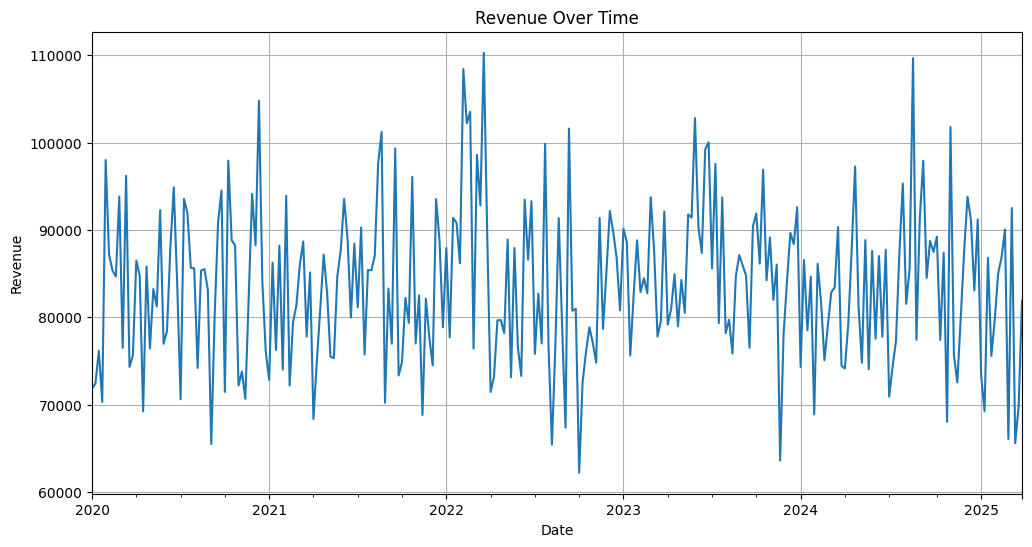

In [64]:
#Revenue Over Time 
plt.figure(figsize=(12,6))
df.groupby("Date")["Revenue"].sum().plot()
plt.title("Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


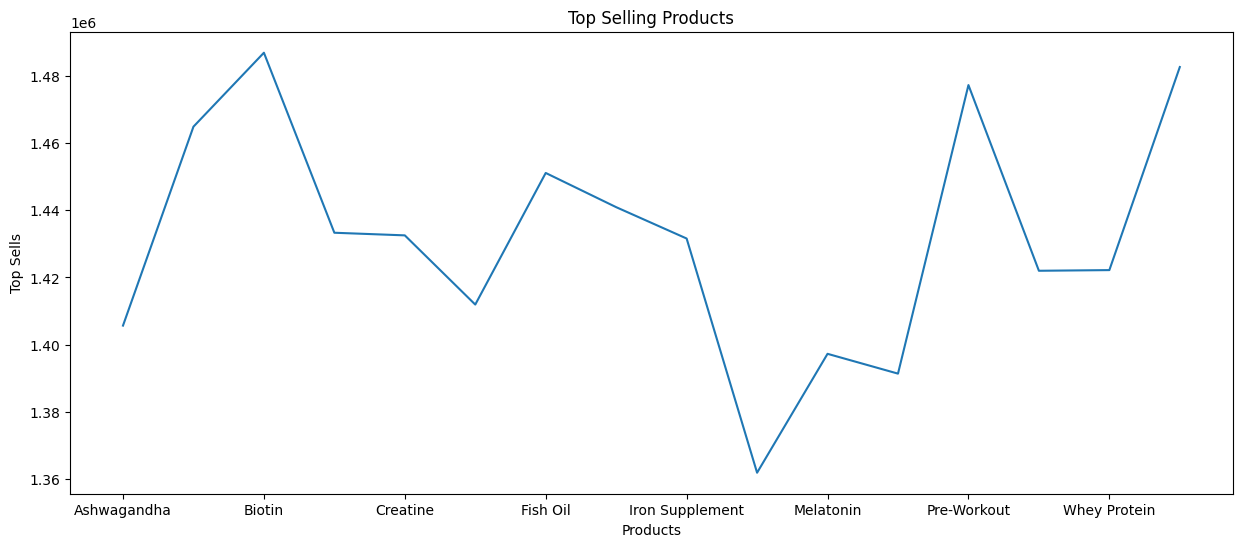

In [65]:
#Top Selling Products 
plt.figure(figsize=(15,6))
df.groupby("Product Name")["Revenue"].sum().plot()
plt.title("Top Selling Products")
plt.xlabel("Products")
plt.ylabel("Top Sells")
plt.show()


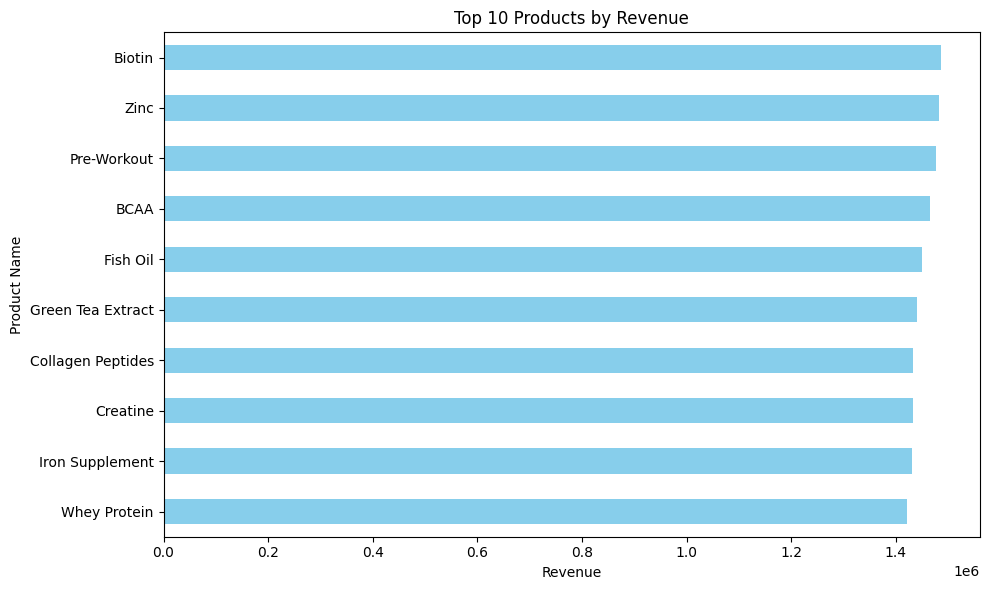

In [66]:
# Top selling products 2 
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

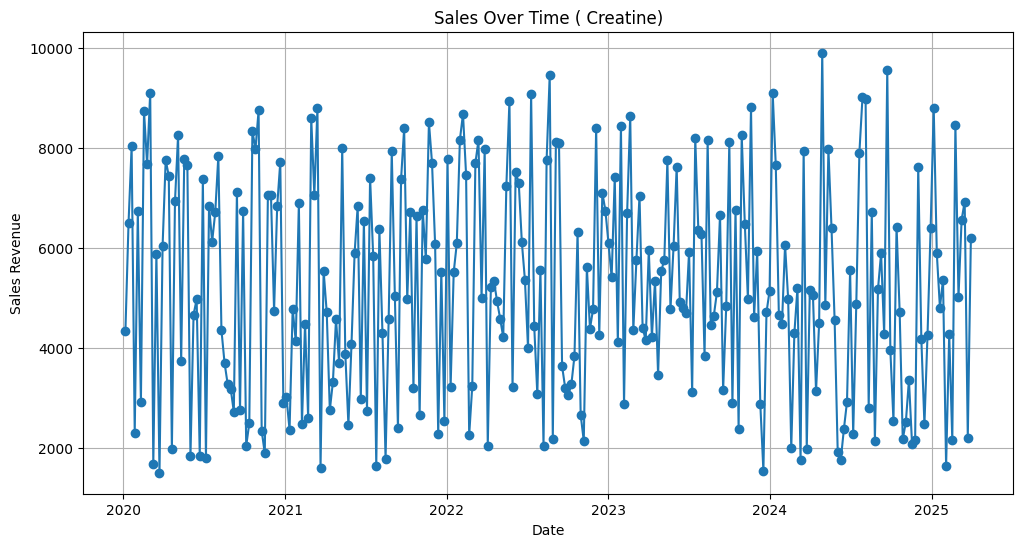

In [76]:
#A Specific Products Sales Over Time ( Creatine)
product_name="Creatine"
filtered_product_name=df[df["Product Name"]==product_name]
#Groupby
sales_over_time=filtered_product_name.groupby("Date")["Revenue"].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_over_time,marker="o",linestyle="-")
plt.grid(True)
plt.title("Sales Over Time ( Creatine)")
plt.xlabel("Date")
plt.ylabel("Sales Revenue")
plt.show()

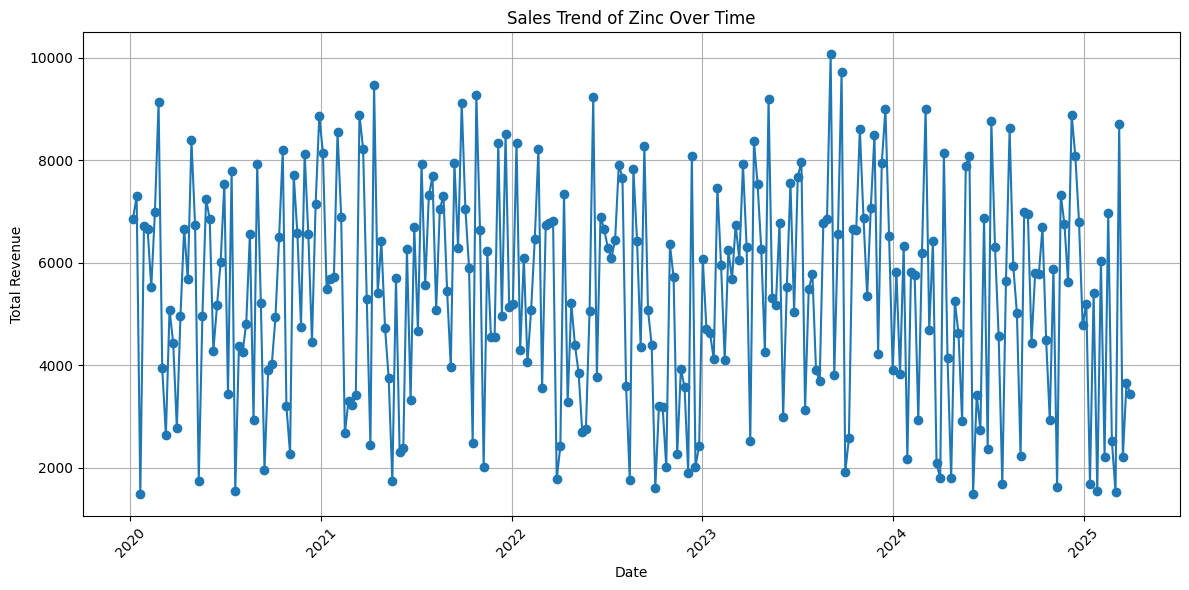

In [74]:
import matplotlib.pyplot as plt

# Define the product name
product_name = "Zinc"

# Filter the DataFrame for the specific product
filtered_product_name = df[df["Product Name"] == product_name]

# Group by Date and sum Revenue
sales_over_time = filtered_product_name.groupby("Date")["Revenue"].sum()

# Correct the figsize tuple
plt.figure(figsize=(12, 6))

# Plot the sales trend
plt.plot(sales_over_time, marker="o", linestyle="-")  # Adding markers for better visibility

plt.title(f"Sales Trend of {product_name} Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.xticks(rotation=45)  # Improve readability
plt.tight_layout()
plt.show()


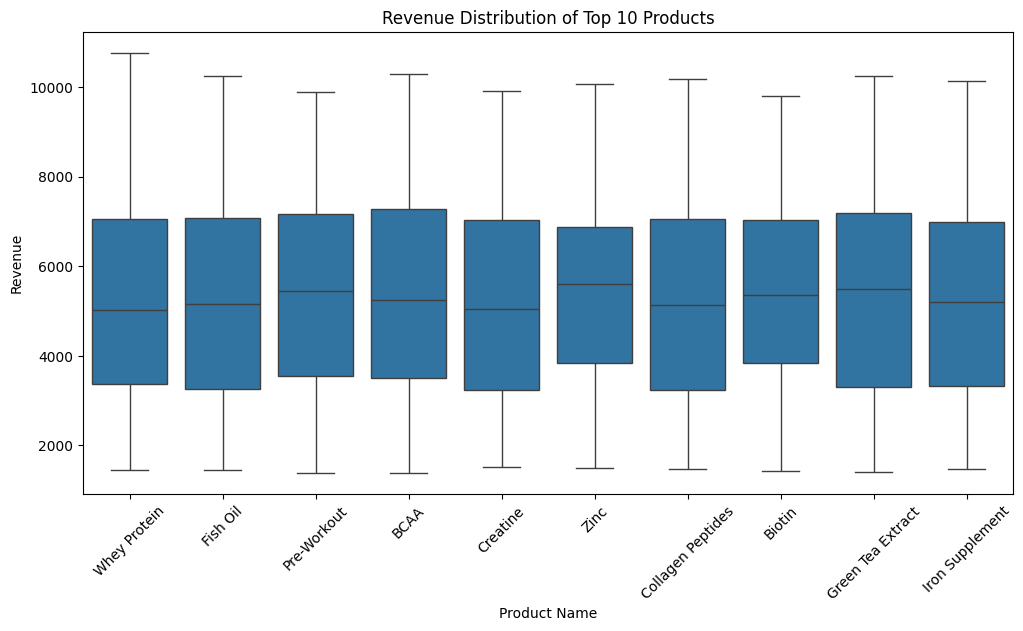

In [ ]:
#"Revenue Distribution of Top 10 Products by box plot 
import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 products
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame
top_products_df = df[df["Product Name"].isin(top_products.index)]  # Filter dataset to keep only top products

# Plot box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=top_products_df, x="Product Name", y="Revenue")

plt.title("Revenue Distribution of Top 10 Products")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)  # Improve readability
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_29428\3510511673.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Revenue', estimator=sum, ci=None) #estimator=sum This controls how the y-values (Revenue) are aggregated , Since you set estimator=sum, it sums up the revenue for each category.


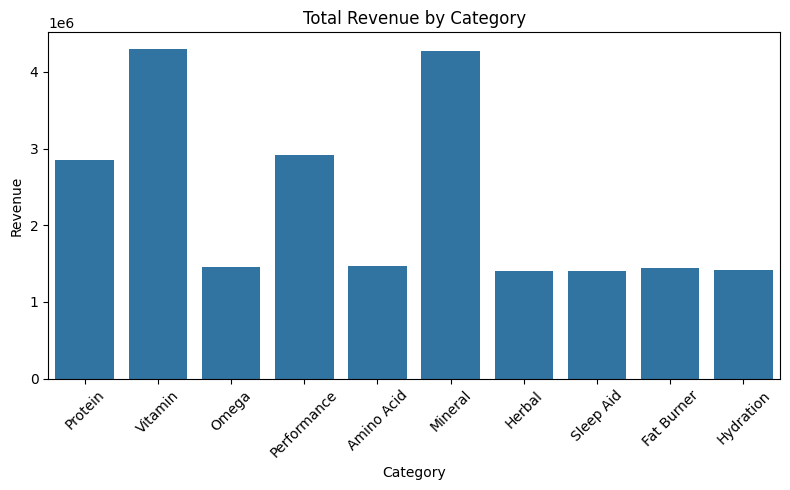

In [81]:
# Revenue by category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Category', y='Revenue', estimator=sum, ci=None) #estimator=sum This controls how the y-values (Revenue) are aggregated , Since you set estimator=sum, it sums up the revenue for each category.
#ci stands for confidence interval. 
#  Normally, Seaborn plots error bars to represent uncertainty in the data (e.g., standard deviation)
#  ci=None disables confidence intervals, meaning no error bars are shown.
plt.title("Total Revenue by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [88]:
df.groupby("Platform").size()

Platform
Amazon     1473
Walmart    1412
iHerb      1499
dtype: int64

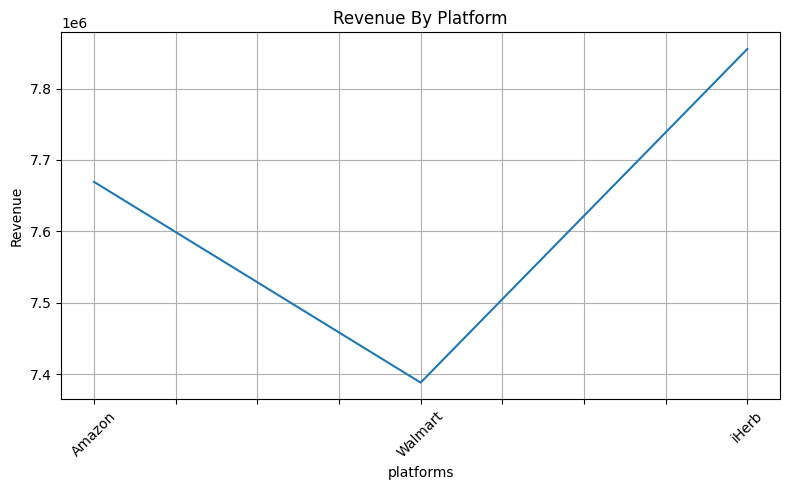

In [89]:
#Revenue By Platform
plt.figure(figsize=(8,5))
df.groupby("Platform")["Revenue"].sum().plot()
plt.title("Revenue By Platform")
plt.xlabel("platforms")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [90]:
# Average discount per category
avg_discount = df.groupby('Category')['Discount'].mean()
print("\nAverage Discount by Category:\n", avg_discount)



Average Discount by Category:
 Category
Amino Acid     0.121642
Fat Burner     0.125657
Herbal         0.126241
Hydration      0.119088
Mineral        0.126557
Omega          0.128905
Performance    0.122737
Protein        0.121515
Sleep Aid      0.124489
Vitamin        0.125389
Name: Discount, dtype: float64


In [96]:
# 4. Feature Engineering
# Create net revenue after returns
returned_value = df['Units Returned'] * df['Price']
df['Net Revenue'] = df['Revenue'] - returned_value

In [97]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Net Revenue
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,4509.18
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,5908.89
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,2078.51
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,2249.80
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,5462.38


In [98]:
# 5. Conclusion Summary
print("\nTop 5 Countries by Revenue:")
print(df.groupby('Location')['Revenue'].sum().sort_values(ascending=False).head())

print("\nTop 5 Platforms by Net Revenue:")
print(df.groupby('Platform')['Net Revenue'].sum().sort_values(ascending=False).head())


Top 5 Countries by Revenue:
Location
Canada    7848579.73
UK        7703960.34
USA       7360740.38
Name: Revenue, dtype: float64

Top 5 Platforms by Net Revenue:
Platform
iHerb      7775017.64
Amazon     7589582.40
Walmart    7315974.52
Name: Net Revenue, dtype: float64
